<img src='img/Screen Shot 2021-10-28 at 1.55.00 AM.png'>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/PlantGrowth.csv'
df = pd.read_csv(url, usecols=[1,2])
df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


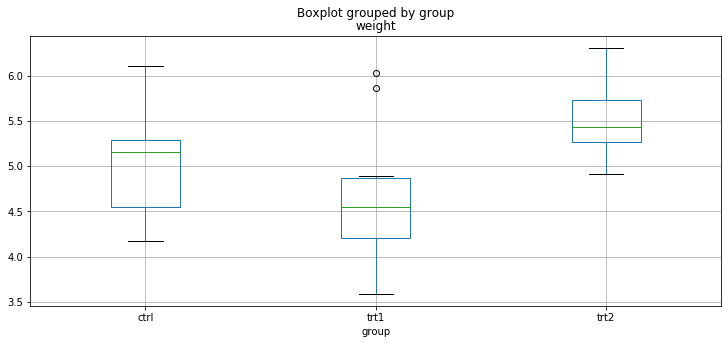

In [3]:
df.boxplot('weight', by='group', figsize=(12, 5));

$$\begin{array}{lll}
\mu_1=\mu_2&\Rightarrow&\mbox{T Test}\\
\\
\mu_1=\mu_2=\cdots=\mu_k&\Rightarrow&\mbox{One Way ANOVA}
\end{array}$$

# Conditions to Check 

<img src='img/Screen Shot 2021-10-25 at 10.54.34 PM.png' width=40%>

[SPSS 일원배치 분산분석(one-way Anova) 방법 / 검정통계량 F / 세 집단 이상의 평균 차이 / 논문쓰는남자 /논쓰남](https://www.youtube.com/watch?v=BbNlIcXxnnw&list=PLq9PcO5TRVWGJKygh_1OHrELC2HkABEh8&index=11)

<img src='img/Screen Shot 2021-10-27 at 11.57.52 PM.png' width=50%>
    
[9.2 - Assumptions for One-Way ANOVA Test](https://online.stat.psu.edu/stat800/lesson/9/9.2)

In [4]:
from statsmodels.formula.api import ols
model = ols('weight ~ C(group)', df).fit()

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     4.846
Date:                Mon, 22 Nov 2021   Prob (F-statistic):             0.0159
Time:                        14:01:51   Log-Likelihood:                -26.810
No. Observations:                  30   AIC:                             59.62
Df Residuals:                      27   BIC:                             63.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.0320      0.197     25.527      0.000       4.628       5.436
C(group)[T.trt1]    -0.3710      0.279     -1.331      0.194      -0.943       0.201
C(group)[T.trt2]     0.4940      0.279      1.772      0.088      -0.078       1.066
==============================================================================
Omnibus:                        1.835   Durbin-Watson:                   2.704
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.406
Skew:                           0.524   Prob(JB):                        0.495
Kurtosis:                       2.835   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src='img/Screen Shot 2021-10-28 at 12.10.54 AM.png' width=70%>
    
[9.3 - The ANOVA Table](https://online.stat.psu.edu/stat800/lesson/9/9.3)

In [6]:
from statsmodels.stats.anova import anova_lm
print(anova_lm(model)) 

            df    sum_sq   mean_sq         F   PR(>F)
C(group)   2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


$$\begin{array}{cccccccc}
&&\text{Linear Regression}&&\text{One Way ANOVA}\\
\text{Model}&&y=\alpha+\beta x
&&
y=\alpha+\sum_{i=1}^{c}\beta_i 1_{x\in C_i}
\\
\text{H}_0&&\beta=0
&&
\quad\beta_1=\cdots=\beta_c\\
\end{array}$$

# Reference

[wiki](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)

Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

[SPSS 일원배치 분산분석(one-way Anova) 방법 / 검정통계량 F / 세 집단 이상의 평균 차이 / 논문쓰는남자 /논쓰남](https://www.youtube.com/watch?v=BbNlIcXxnnw&list=PLq9PcO5TRVWGJKygh_1OHrELC2HkABEh8&index=11)